In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import os
print(os.getcwd())


d:\python codes


In [4]:
import pandas as pd

sheets = pd.read_excel(r"d:\python codes\Regional Sales Dataset.xlsx", sheet_name=None)


In [5]:
print(sheets)

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
0       SO - 000225 2014-01-01                  126    Wholesale   
1      SO - 0003378 2014-01-01                   96  Distributor   
2      SO - 0005126 2014-01-01                    8    Wholesale   
3      SO - 0005614 2014-01-01                   42       Export   
4      SO - 0005781 2014-01-01                   73    Wholesale   
...             ...        ...                  ...          ...   
64099  SO - 0007573 2018-02-28                   74    Wholesale   
64100  SO - 0007706 2018-02-28                   51       Export   
64101  SO - 0007718 2018-02-28                  136  Distributor   
64102  SO - 0008084 2018-02-28                  158  Distributor   
64103  SO - 0008654 2018-02-28                   22  Distributor   

      Currency Code Warehouse Code  Delivery Region Index  \
0               USD         AXW291                    364   
1               USD         AXW291          

Assign dataframe to each sheet

In [6]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [7]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [8]:
df_state_reg.head

<bound method NDFrame.head of        Column1               Column2    Column3
0   State Code                 State     Region
1           AL               Alabama      South
2           AR              Arkansas      South
3           AZ               Arizona       West
4           CA            California       West
5           CO              Colorado       West
6           CT           Connecticut  Northeast
7           DC  District of Columbia      South
8           DE              Delaware      South
9           FL               Florida      South
10          GA               Georgia      South
11          HI                Hawaii       West
12          IA                  Iowa    Midwest
13          ID                 Idaho       West
14          IL              Illinois    Midwest
15          IN               Indiana    Midwest
16          KS                Kansas    Midwest
17          KY              Kentucky      South
18          LA             Louisiana      South
19        

In [9]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head

<bound method NDFrame.head of 0  State Code                 State     Region
0          AL               Alabama      South
1          AR              Arkansas      South
2          AZ               Arizona       West
3          CA            California       West
4          CO              Colorado       West
5          CT           Connecticut  Northeast
6          DC  District of Columbia      South
7          DE              Delaware      South
8          FL               Florida      South
9          GA               Georgia      South
10         HI                Hawaii       West
11         IA                  Iowa    Midwest
12         ID                 Idaho       West
13         IL              Illinois    Midwest
14         IN               Indiana    Midwest
15         KS                Kansas    Midwest
16         KY              Kentucky      South
17         LA             Louisiana      South
18         MA         Massachusetts  Northeast
19         MD              Mar

In [10]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [11]:
df_budgets.isnull().sum()


Product Name    0
2017 Budgets    0
dtype: int64

In [12]:
df_customers.isnull().sum()


Customer Index    0
Customer Names    0
dtype: int64

In [13]:
df_products.isnull().sum()


Index           0
Product Name    0
dtype: int64

In [14]:
df_regions.isnull().sum()


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [15]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

DATA CLEANING

In [16]:
# Merge with customers

df =df_sales.merge(df_customers, how='left', left_on='Customer Name Index', right_on='Customer Index')


In [17]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [18]:
# Merge with products

df= df.merge(df_products, how='left', left_on='Product Description Index', right_on='Index')

In [19]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [20]:
# Merge with regions 

df= df.merge(df_regions, how='left', left_on='Delivery Region Index', right_on='id')

In [21]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [22]:
df.columns.values


array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index',
       'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'], dtype=object)

In [23]:
# Merge with budgets

df= df.merge(df_budgets, how='left', on='Product Name')

In [24]:
# Merge with state regions

df= df.merge(df_state_reg[["State Code","Region"]], how='left', left_on='state_code', right_on='State Code')

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [26]:
df.to_csv('file.csv')

Clean up redundant column

In [27]:
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop,errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,Northeast


Convert all columns to lower case for consistency and easier access

In [28]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       '2017 budgets', 'region'], dtype=object)

In [29]:
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 budgets,region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,Northeast


Keep the important columns and delete the columns that we don't need 

In [30]:
cols_to_keep = ['ordernumber', 'orderdate', 'customer names', 'channel','product name',
                'order quantity', 'unit price', 'line total','total unit cost','state_code',
                'county', 'state', 'region','latitude', 'longitude', '2017 budgets'] 

In [31]:
df = df[cols_to_keep]

In [32]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


Blank out budgets for non-2017 budgets

In [33]:
df.loc[df['orderdate'].dt.year != 2017, '2017 budgets'] = pd.NA

In [34]:
df[['orderdate','product name','line total','2017 budgets']].head()

,orderdate,product name,line total,2017 budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [35]:
df.to_csv('final.csv')

In [36]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      64104 non-null  object        
 1   orderdate        64104 non-null  datetime64[ns]
 2   customer names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product name     64104 non-null  object        
 5   order quantity   64104 non-null  int64         
 6   unit price       64104 non-null  float64       
 7   line total       64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

Filter the dataset to include only records from year 2017

In [37]:
df_2017 = df[df['orderdate'].dt.year == 2017]

In [38]:
df.isnull().sum()

ordernumber            0
orderdate              0
customer names         0
channel                0
product name           0
order quantity         0
unit price             0
line total             0
total unit cost        0
state_code             0
county                 0
state                  0
region                 0
latitude               0
longitude              0
2017 budgets       48841
dtype: int64

In [39]:
df_2017.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


Feature Engineering

In [40]:
df.loc[:, 'total cost'] = df['order quantity'] * df['total unit cost']


In [41]:
df.loc[:, 'profit'] = df['line total'] - df['total cost']


In [42]:
df.loc[:, 'profit margin'] = df['profit'] / df['line total'] * 100

In [43]:
# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df.loc[:, 'order_month_name'] = df['orderdate'].dt.month_name()



In [44]:
# 5. Extract month number from order_date for correct sorting (1–12)
df.loc[:, 'order_month_num'] = df['orderdate'].dt.month

In [45]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,...,state,region,latitude,longitude,2017 budgets,total cost,profit,profit margin,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1


**Exploratory Data Analysis**

-------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 1. Monthly Sales Trend Over Time

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

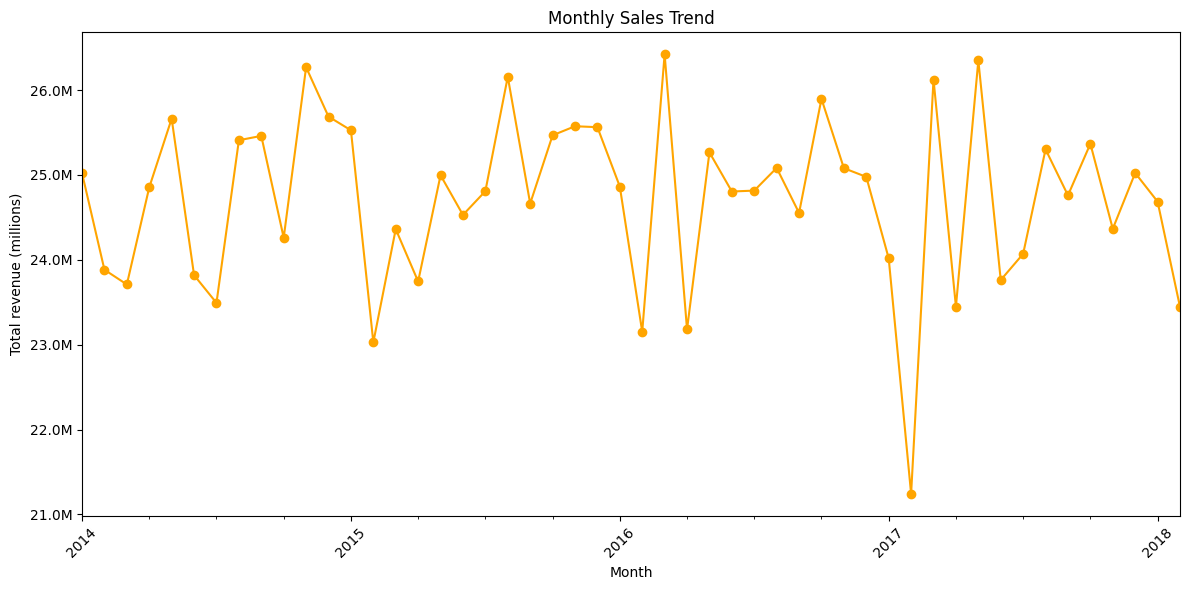

In [46]:
df['ordermonth'] = df['orderdate'].dt.to_period('M')
monthly_sales = df.groupby('ordermonth')['line total'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='orange')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total revenue (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INSIGHTS ---
Sales consistently cycle between 24M and
26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 2. Monthly Sales Trend (All Years Combined)

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

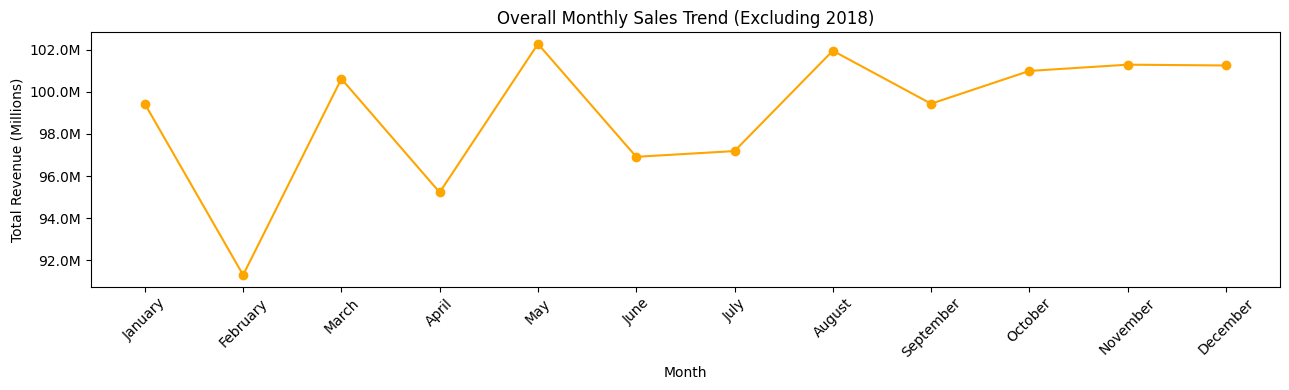

In [47]:
# 1. Filter out any 2018 orders
df_ = df[df['orderdate'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['line total']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='orange'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()


INSIGHTS ---

Across all years, January begins strong with roughly 
95 M).

Sales rebound in May and August (≈
99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

---------------------------------------------------------------------------------------------------------------------------------------------

**🔹 3. Top 10 Products by Revenue (in Millions)**

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\1838892199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


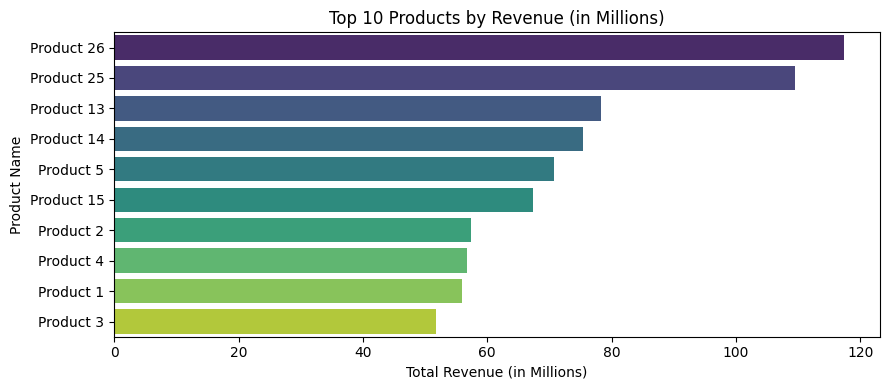

In [48]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product name')['line total'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**🔹 Bottom 10 Products by Revenue (in Millions)**

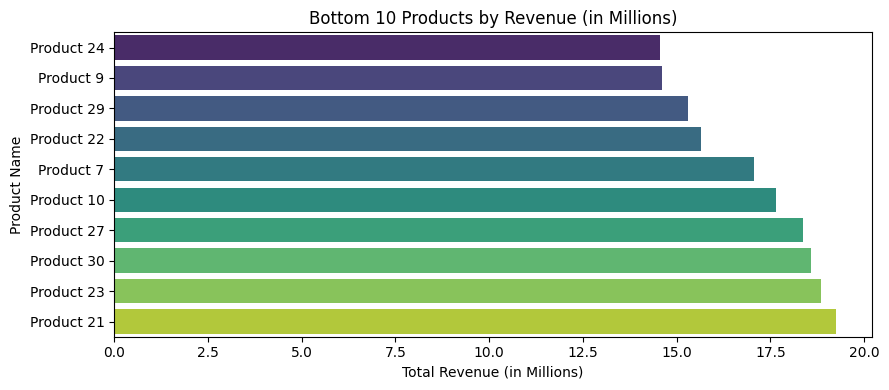

In [49]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product name')['line total'].sum() / 1_000_000

# Select the bottom 10 products by revenue
bottom_prod = top_prod.nsmallest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart
sns.barplot(
    x=bottom_prod.values,     # X-axis: revenue values in millions
    y=bottom_prod.index,      # Y-axis: product names
    hue=bottom_prod.index,    # assign hue to prevent FutureWarning
    palette='viridis',        # Color palette for bars
    dodge=False,
    legend=False
)

# Add title and axis labels
plt.title('Bottom 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


Products 18 and 28 lead with average profit margins of approximately 8.0-8.3k, followed closely by Product5 and Product11 around
7.9–8.0 K.

Mid-tier performers like Products 12, 26, and 21 cluster in the 7.7-7.8k range, while the bottom tier (Product4,16,and 1) fall between
7.4–7.6 K.

Focusing on margin optimization strategies from top performers may help elevate overall product profitability.

------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 5. Sales by Channel (Pie Chart)

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

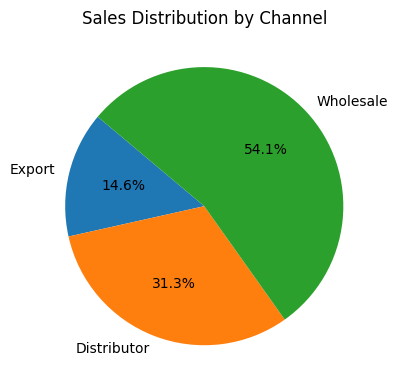

In [50]:
chan_sales = df.groupby('channel')['line total'].sum().sort_values(ascending=True)
plt.figure(figsize=(8,4))
plt.pie(chan_sales, labels=chan_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Channel')
plt.tight_layout()
plt.show()

INSIGHTS ---
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

--------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 6. Average Order Value (AOV) Distribution

Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

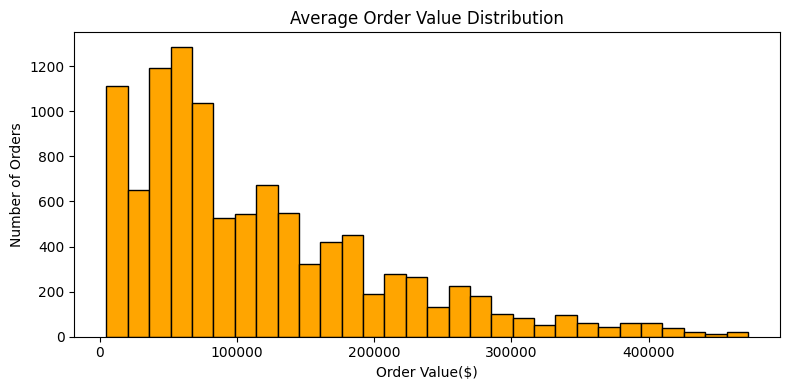

In [51]:
aov = df.groupby('ordernumber')['line total'].sum()
plt.figure(figsize=(8,4))
plt.hist(aov, bins=30, color='orange', edgecolor='black')
plt.title('Average Order Value Distribution')
plt.xlabel('Order Value($)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between 
120 K and a pronounced mode around 50k-60k.

A long tail of high-value transactions extends up toward 
500 K, but these large orders represent only a small share of total volume.

--------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 7. Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

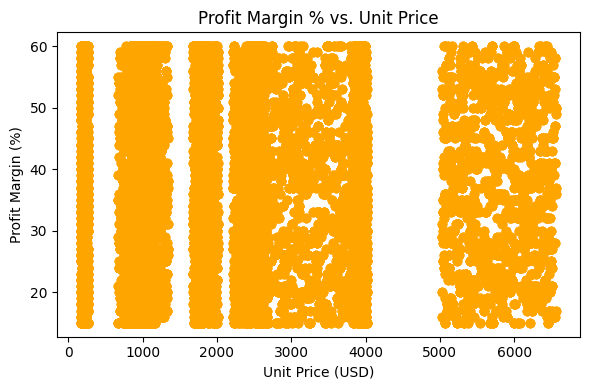

In [52]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['line total']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='orange'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

INSIGHTS ---
Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near 
6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

-------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 8. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

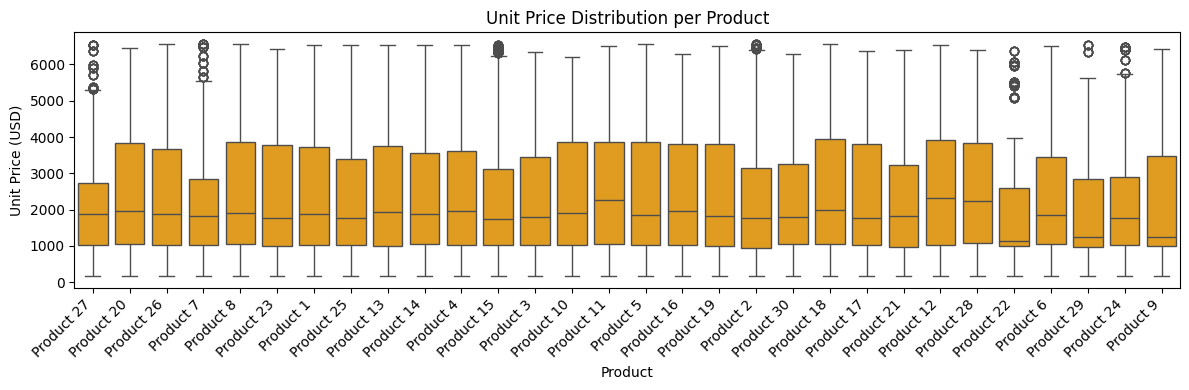

In [53]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product name',   # X-axis: product categories
    y='unit price',      # Y-axis: unit price values
    color='orange'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 
100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

---------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 9. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

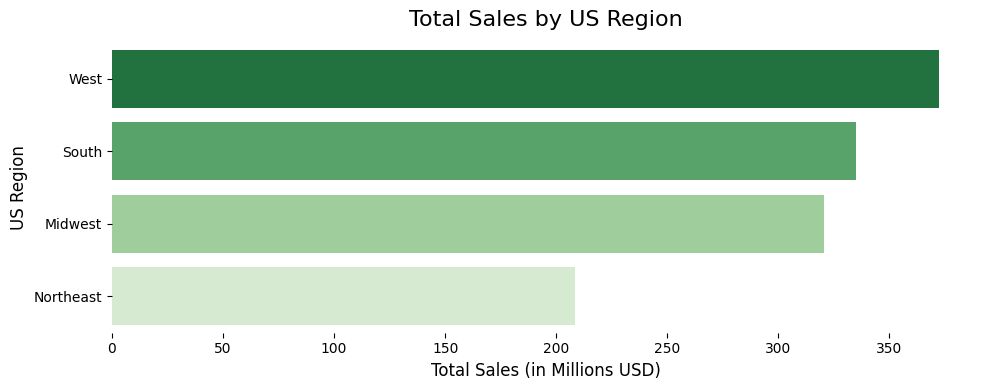

In [54]:
# Aggregate total sales by region (in millions)
region_sales = (
    df.groupby('region')['line total']
    .sum()
    .sort_values(ascending=False) / 1_000_000
).reset_index()

# Rename columns for clarity
region_sales.columns = ['US Region', 'Total Sales (Millions)']

# Create the figure
plt.figure(figsize=(10, 4))

# Plot horizontal bar chart
sns.barplot(
    data=region_sales,
    x='Total Sales (Millions)',
    y='US Region',
    hue='US Region',       # Prevent FutureWarning & color by region
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Add formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

# Adjust and show
plt.tight_layout()
plt.show()


INSIGHTS —
West dominates with roughly $360 M in sales (~35 % of total), underscoring its market leadership.
South & Midwest each contribute over $320 M (~32 %), indicating strong, consistent demand across central regions.
Northeast trails at about $210 M (~20 %), signaling room for growth and targeted investment.
Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.

INSIGHTS ---
California leads by a wide margin, generating about $230 M in revenue and 7500 orders—more than twice the next-highest state.

Illinois, Florida, and Texas form a solid second tier, each posting $85–110 M in revenue with 3 600–4 600 orders.

New York and Indiana are mid-pack (≈54-55M 2500 orders), while connectict, Michigan, and Massachusettstrailat
35–44 M with 1 600–2 100 orders.

The close alignment between revenue and order counts suggests similar average order values across states; to drive growth, focus on increasing order volume in the mid-tier and raising order size in lower-performing regions.

------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 10. Total Sales by State (Choropleth Map)
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

States shaded by total sales (in millions USD) using a blue gradient
Legend on the right showing sales scale (M USD)
Hover tooltips display exact sales for each state
Map scoped to USA for clear regional context

In [55]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state_code')['line total']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['line total'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state_code',            # column with state codes
    locationmode='USA-states'
,    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

INSIGHTS —
-**California leads** with 230M,followed by IIliinious(  
112 M) and Florida (90M), formingadomiattop, tier(> 
90 M).

-**Mid‑tier states** (e.g., Texas  85.M, Newyork
55 M) hold steady performance but trail the top three by 40–145 M.

-**Lower‑tier states** (e.g., New Jersey 47.M down to Massachusetts 
35 M) reveal a gradual drop, indicating uneven market penetration.

-**Action**: Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.

--------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 11. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\2376554476.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\2376554476.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




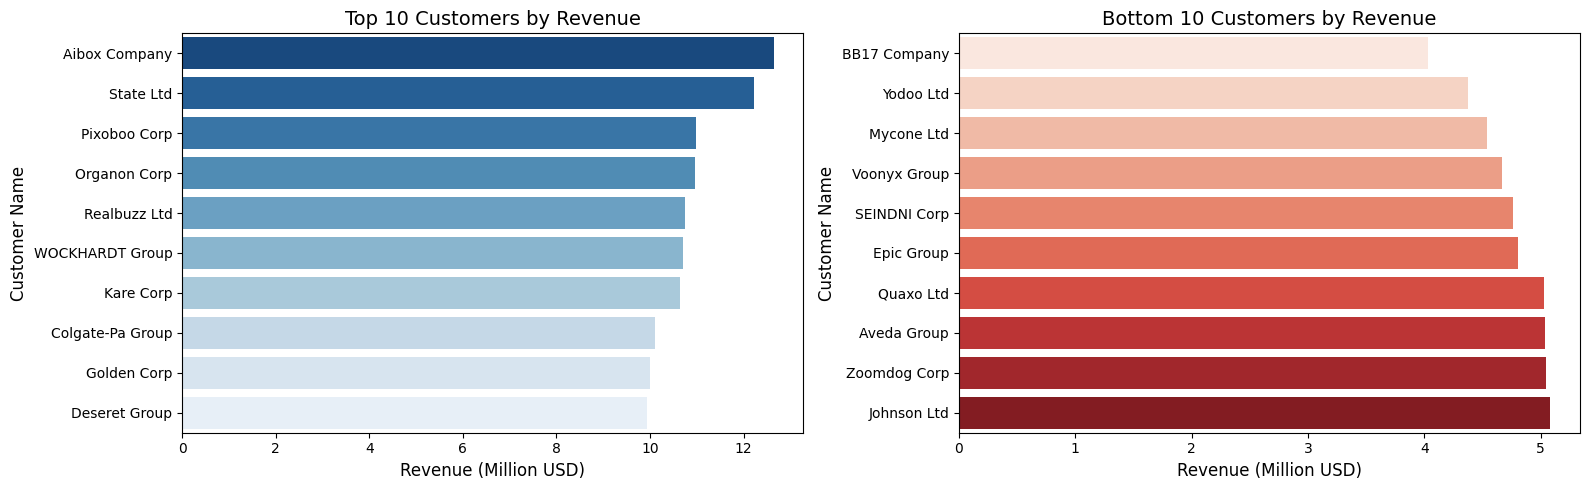

In [58]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer names')['line total']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer names')['line total']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

INSIGHTS ---
- Aibox Company tops the list with 21.5M, followed closely byState ltd(
12.2 M), while the 10th-ranked Deseret Group still contributes 9.9M- demonstraitingatight 
10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with 
4.1 M—roughly half the top customer’s revenue.

- This steep drop from ~10M+ to 
4–5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.

------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 12. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\15237516.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




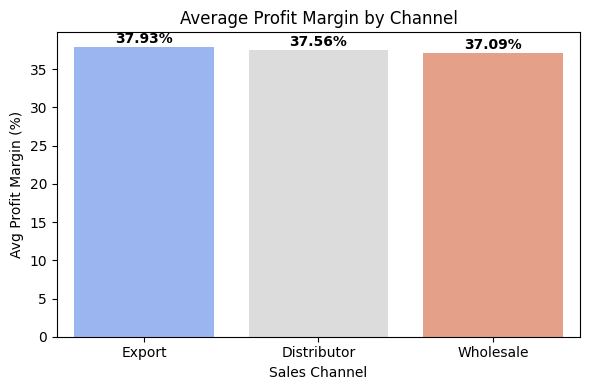

In [59]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

INSIGHTS ---
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

This uniformity implies well-controlled costs and pricing power everywhere.

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

-------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 13. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\1604905035.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




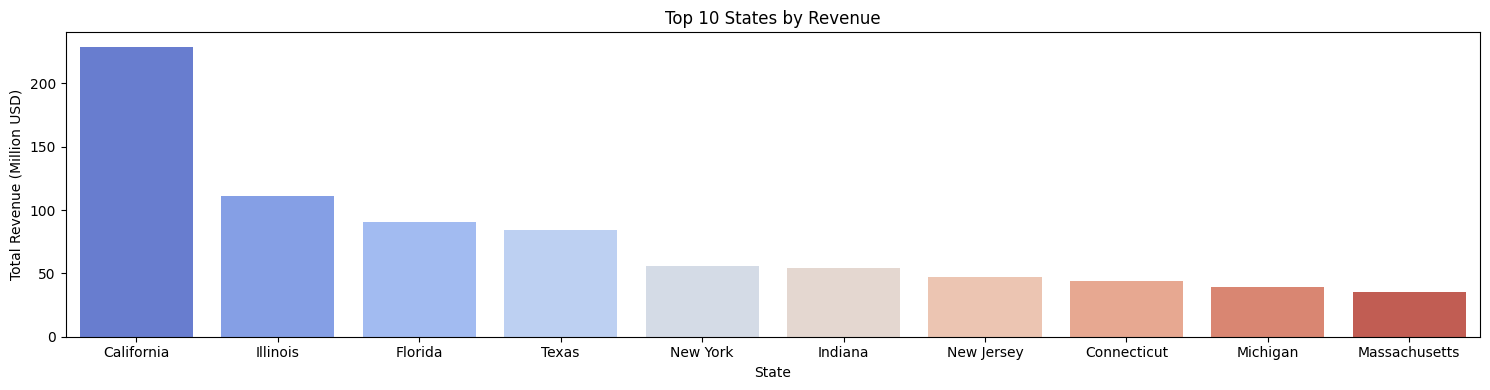

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1896\1604905035.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




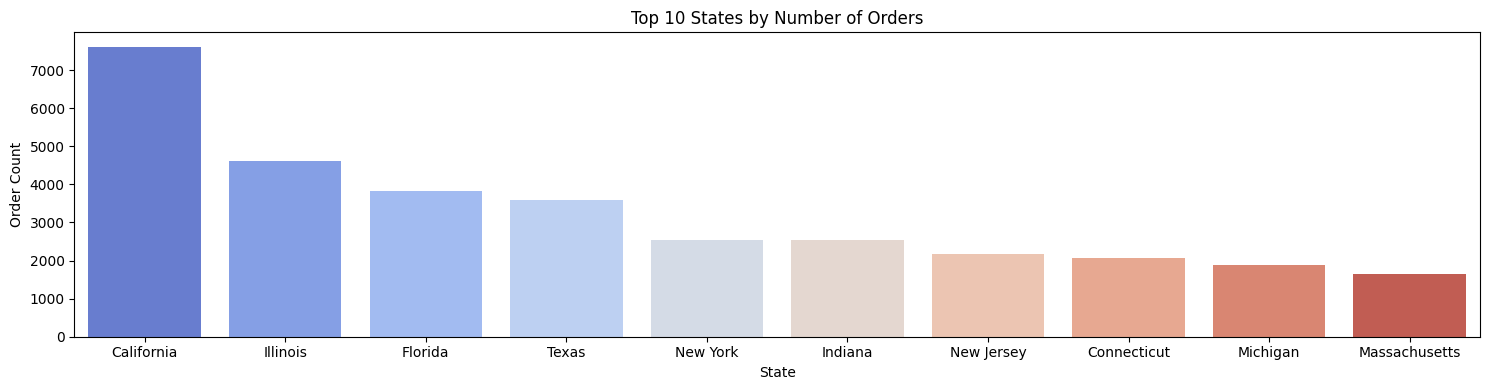

In [62]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state').agg(
    revenue=('line total', 'sum'),          # Sum up revenue per state
    orders=('ordernumber', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

---------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 14. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

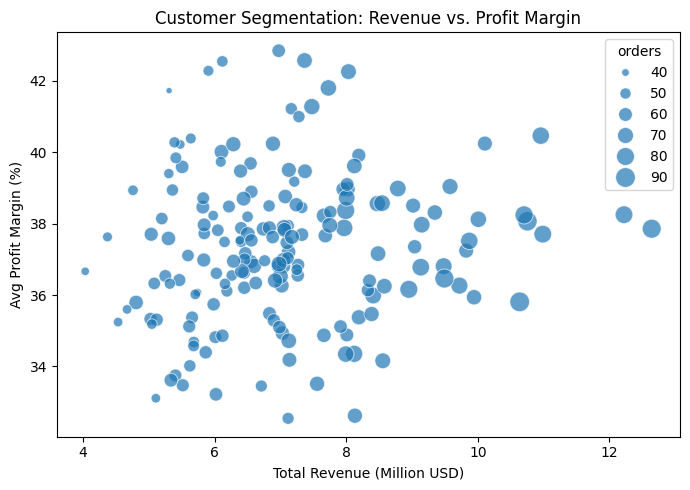

In [64]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer names').agg(
    total_revenue=('line total', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('ordernumber', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

INSIGHTS ---
- Customers with >$10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.

- Most customers cluster within the $6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier.

- Customers below $6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.

- Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

----------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 15. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

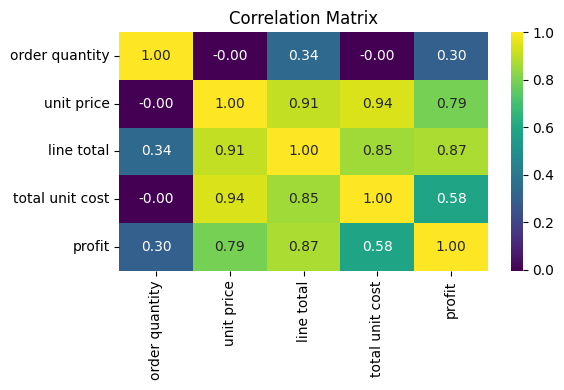

In [65]:
# List numeric columns to include in the correlation calculation
num_cols = ['order quantity', 'unit price', 'line total', 'total unit cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

INSIGHTS ---
- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.

- Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.

- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.

- Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

---------------------------------------------------------------------------------------------------------------------------------------------------

**Saving Pre-Processed Dataframe**

In [66]:
df

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,...,latitude,longitude,2017 budgets,total cost,profit,profit margin,order_month_name,order_month_num,ordermonth,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2018-02,46.0
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2018-02,33.0
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2018-02,33.0
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2018-02,26.0


In [67]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

🔍 **Key Insights**

**Monthly Revenue Cycle**:
Revenue stays stable between ≈ 23M
26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

**Channel Mix**:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

**Top Products** (Revenue):
Product 26: 118m,Product 25
110M; Product 13: 78M .Mid tier:
68–75M; bottom performers: $52–57M.

**Profit Margins**:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

**Seasonal Volume**:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

**Regional Performance**:
California leads: ≈230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & ≈3500–4500 orders. NY/Indiana: ≈
54M & 2000+ orders.

-------------------------------------------------------------------------------------------------------------------------------------------------

💡 **Recommendations**

- **Outlier Strategy**: Exclude or formalize bulk-order and promotional SKUs when calculating averages.

- **Margin Uplift**: Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.

- **Export Growth**: Invest in targeted overseas marketing and distributor partnerships.

- **Seasonal Planning**: Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.

- **Dashboard Prep**: Build aggregated tables for time series, channel mix, and product performance for Power BI.